# DL Data

In [58]:
import pandas as pd
url="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls"
MyData=pd.read_excel(url)
MyData_sort = MyData.sort_values('DateRep')
MyData_sort

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
5528,2019-12-31,31,12,2019,0,0,Vietnam,VN
4031,2019-12-31,31,12,2019,0,0,Pakistan,PK
2118,2019-12-31,31,12,2019,0,0,Greece,EL
4144,2019-12-31,31,12,2019,0,0,Philippines,PH
2036,2019-12-31,31,12,2019,0,0,Germany,DE
...,...,...,...,...,...,...,...,...
3046,2020-03-18,18,3,2020,8,0,Lithuania,LT
3038,2020-03-18,18,3,2020,0,0,Liechtenstein,LI
3036,2020-03-18,18,3,2020,1,0,Liberia,LR
3288,2020-03-18,18,3,2020,11,0,Mexico,MX


In [598]:
from datetime import timedelta, date
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

## Preparation Iran Dataset

In [74]:
#MyData_sort.set_index('Countries and territories', inplace=True)
IranData=MyData_sort.loc["Iran"]
#IranData=IranData.reset_index()
#IranData_id=IranData.set_index("DateRep", inplace=True)
#IranData=IranData.sort_values('DateRep')
#IranData=IranData.set_index("DateRep", inplace=True)
a=IranData.set_index("DateRep", inplace=True)
IranData

,Day,Month,Year,Cases,Deaths,GeoId
DateRep,,,,,,
2019-12-31,31,12,2019,0,0,IR
2020-01-01,1,1,2020,0,0,IR
2020-01-02,2,1,2020,0,0,IR
2020-01-03,3,1,2020,0,0,IR
2020-01-04,4,1,2020,0,0,IR
...,...,...,...,...,...,...
2020-03-14,14,3,2020,1289,85,IR
2020-03-15,15,3,2020,1365,97,IR
2020-03-16,16,3,2020,1209,113,IR


# Plotting

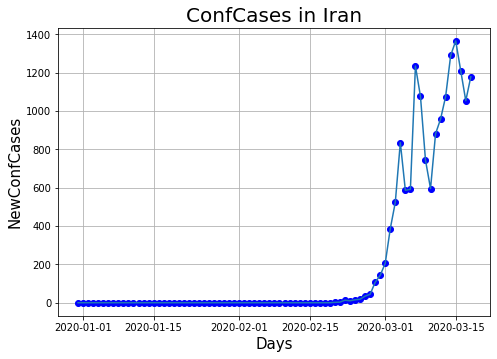

In [75]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("NewConfCases",fontsize=15)
plt.title("ConfCases in Iran",fontsize=20)
plt.plot(IranData["Cases"],"bo")
plt.plot(IranData["Cases"])
plt.show()

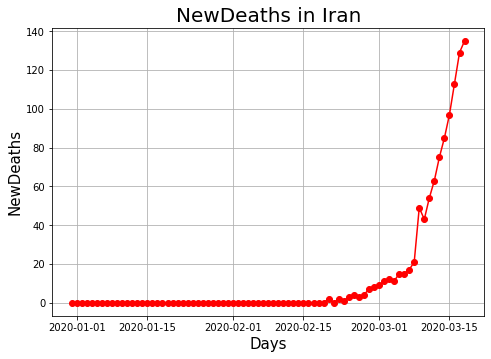

In [76]:
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("NewDeaths",fontsize=15)
plt.title("NewDeaths in Iran",fontsize=20)
plt.plot(IranData["Deaths"],"ro")
plt.plot(IranData["Deaths"],color="red")
plt.show()

In [77]:
IranData_id=IranData.reset_index()
IranData_id=IranData_id.reset_index()
IranData_id

,index,DateRep,Day,Month,Year,Cases,Deaths,GeoId
0,0,2019-12-31,31,12,2019,0,0,IR
1,1,2020-01-01,1,1,2020,0,0,IR
2,2,2020-01-02,2,1,2020,0,0,IR
3,3,2020-01-03,3,1,2020,0,0,IR
4,4,2020-01-04,4,1,2020,0,0,IR
...,...,...,...,...,...,...,...,...
74,74,2020-03-14,14,3,2020,1289,85,IR
75,75,2020-03-15,15,3,2020,1365,97,IR
76,76,2020-03-16,16,3,2020,1209,113,IR
77,77,2020-03-17,17,3,2020,1053,129,IR


# Split Data to Train and Test Set

In [147]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(IranData_id, test_size=0.2, random_state=42)
train_set.head(2)

,index,DateRep,Day,Month,Year,Cases,Deaths,GeoId
73,73,2020-03-13,13,3,2020,1075,75,IR
61,61,2020-03-01,1,3,2020,205,9,IR


# 1.NewDeaths Analysis  

### Regression Method

In [148]:
import numpy as np
import sklearn.linear_model
# Select a linear model
model = sklearn.linear_model.LinearRegression()
y = np.c_[train_set["Deaths"]]
X = np.c_[train_set["index"]]
# Train the model
model.fit(X, y)
#print(model.predict([[73]]))
z=[float(model.predict([i])) for i in X]

# Plotting Regression

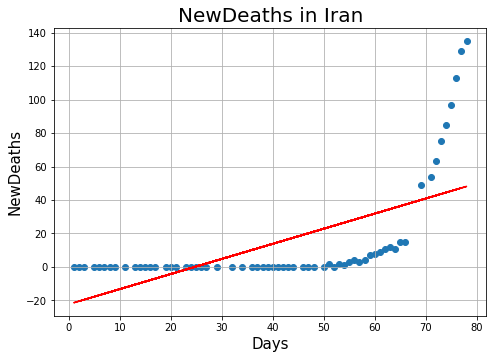

In [149]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("NewDeaths",fontsize=15)
plt.title("NewDeaths in Iran",fontsize=20)
plt.scatter(X,train_set["Deaths"])
plt.plot(X, z,color="red")
plt.show()

# MSE 

In [81]:
from sklearn.metrics import mean_squared_error
#housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(y, z)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

25.35963856659229

#  DecisionTreeRegressor

In [82]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
model = sklearn.tree.DecisionTreeRegressor()
y = np.c_[train_set["Deaths"]]
X = np.c_[train_set["index"]]
model.fit(X, y)
z=[float(model.predict([i])) for i in X]

# MSE

In [83]:
#housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(y, z)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Cross-Validation

In [84]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, y, z,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [85]:
 def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [3.79849594 0.37796447 2.26778684 4.89897949 3.67423461 2.44948974
 6.53197265 4.60072458 0.         2.081666  ]
Mean: 3.0681314324036153
Standard deviation: 1.9299390538543373


# Compare DecisionTree and Linear Regression 

In [ ]:
lin_scores = cross_val_score(lin_reg, y, z,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

# RandomForestRegressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
y = np.c_[train_set["Deaths"]]
X = np.c_[train_set["index"]]
forest_reg.fit(X,y.ravel())
#z=[float(model.predict([i])) for i in X]

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [92]:
forest_scores = cross_val_score(forest_reg, y, z,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.64817997 0.37796447 5.7587201  0.73484692 1.20069424 2.45492702
 2.62075053 1.87483333 0.         0.77028133]
Mean: 1.8441197910397058
Standard deviation: 1.5904651329572799


# Polynomial Regression (deg=2)

In [150]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [151]:
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([22.52844449]), array([[-2.50598174,  0.04314094]]))

In [152]:
X1 = np.linspace(0,80,63)
a1=lin_reg.coef_[0][0]
a2=lin_reg.coef_[0][1]
a0=float(lin_reg.intercept_)
y2=(a1*X1)+(a2*X1**2)+a0

# Plotting Polynomial Regression

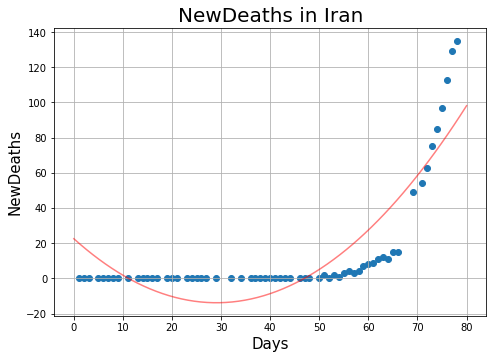

In [153]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("NewDeaths",fontsize=15)
plt.title("NewDeaths in Iran",fontsize=20)
plt.scatter(X,train_set["Deaths"])
plt.plot(X1, y2,alpha=0.5,color="red")
plt.show()

# Polynomial Regression (deg=3)

In [154]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [155]:
lin_reg =  sklearn.linear_model.LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-15.02747312]),
 array([[ 3.10730920e+00, -1.30985220e-01,  1.45020357e-03]]))

In [156]:
X1 = np.linspace(0,80,63)
a1=lin_reg.coef_[0][0]
a2=lin_reg.coef_[0][1]
a3=lin_reg.coef_[0][2]
a0=float(lin_reg.intercept_)
y3=(a1*X1)+(a2*X1**2)+(a3*X1**3)+a0

# Plotting Polynomial Regression

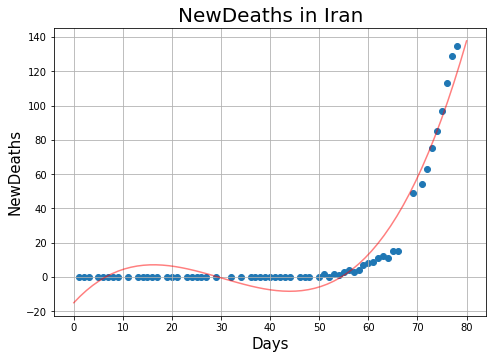

In [157]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("NewDeaths",fontsize=15)
plt.title("NewDeaths in Iran",fontsize=20)
plt.scatter(X,train_set["Deaths"])
plt.plot(X1, y3,alpha=0.5,color="red")
plt.show()

# Polynomial Regression (deg=10)

In [158]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [159]:
lin_reg =  sklearn.linear_model.LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([0.14384496]),
 array([[-9.43531512e-08,  2.18248125e-06, -1.68089403e-05,
         -1.06299262e-04,  1.49934925e-05, -8.41201920e-07,
          2.42517695e-08, -3.80584663e-10,  3.09111994e-12,
         -1.01570897e-14]]))

In [160]:
X1 = np.linspace(0,80,63)
a=[]
y10=float(lin_reg.intercept_)
for i in range(10):
    a.append(lin_reg.coef_[0][i])
    y10=y10+a[i]*(X1**(i+1))

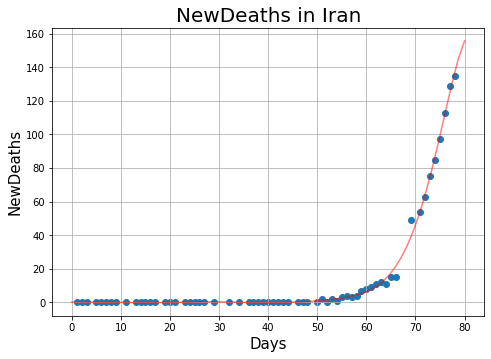

In [161]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
#from numpy.polynomial.polynomial import polyfit
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("NewDeaths",fontsize=15)
plt.title("NewDeaths in Iran",fontsize=20)
plt.scatter(X,train_set["Deaths"])
plt.plot(X1, y10,alpha=0.5,color="red")
plt.show()

## Comparing Linear and Polynomial Regression

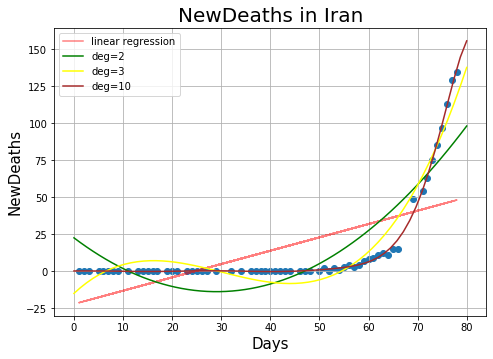

In [162]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("NewDeaths",fontsize=15)
plt.title("NewDeaths in Iran",fontsize=20)
plt.scatter(X,train_set["Deaths"])
plt.plot(X, z,alpha=0.5,color="red")
plt.plot(X1, y2,color="green")
plt.plot(X1, y3,color="yellow")
plt.plot(X1, y10,color="brown")
plt.legend(["linear regression","deg=2","deg=3","deg=10"])
plt.show()

In [164]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(["train","val"])

### Learning Curve(linear Regression)

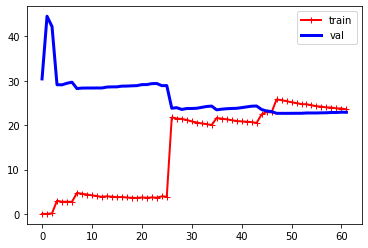

In [176]:
lin_reg =  sklearn.linear_model.LinearRegression()
#i=IranData.reset_index()
#IranData=i.reset_index()
y0 = np.c_[IranData["Deaths"]]
X0 = np.c_[IranData["index"]]
plot_learning_curves(lin_reg, X0, y0)

### Learning Curve(Polynomial Regression deg=2)

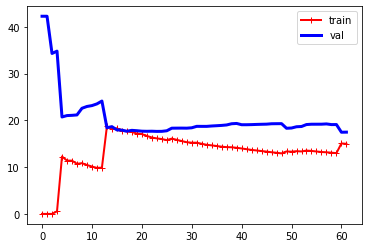

In [177]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
("lin_reg",  sklearn.linear_model.LinearRegression()),
])
plot_learning_curves(polynomial_regression, X0, y0)

### Learning Curve(Polynomial Regression deg=10)

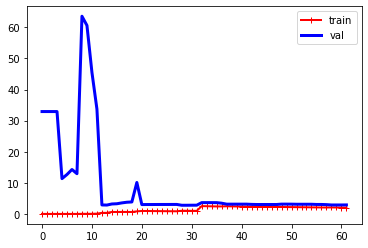

In [178]:
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg",  sklearn.linear_model.LinearRegression()),
])
plot_learning_curves(polynomial_regression, X0, y0)

# 2. NewConfCases Analysis

### linear regression

In [179]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
y = np.c_[train_set["Cases"]]
X = np.c_[train_set["index"]]
model.fit(X, y)
z=[float(model.predict([i])) for i in X]

### Polynomial Regression (deg=2)

In [180]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
X1 = np.linspace(0,80,63)
a1=lin_reg.coef_[0][0]
a2=lin_reg.coef_[0][1]
a0=float(lin_reg.intercept_)
y2=(a1*X1)+(a2*X1**2)+a0

### Polynomial Regression (deg=3)

In [181]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
a1=lin_reg.coef_[0][0]
a2=lin_reg.coef_[0][1]
a3=lin_reg.coef_[0][2]
a0=float(lin_reg.intercept_)
y3=(a1*X1)+(a2*X1**2)+(a3*X1**3)+a0

### Polynomial Regression (deg=10)

In [182]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
a=[]
y10=float(lin_reg.intercept_)
for i in range(10):
    a.append(lin_reg.coef_[0][i])
    y10=y10+a[i]*(X1**(i+1))

# Comparing Linear and Polynomial Regression

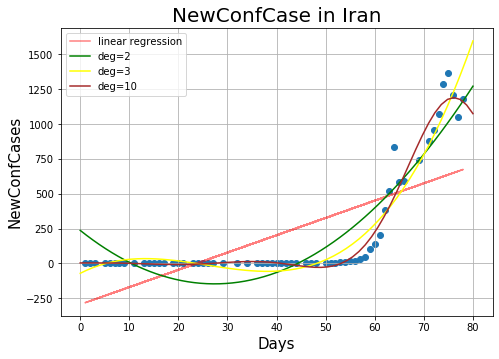

In [183]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("NewConfCases",fontsize=15)
plt.title("NewConfCase in Iran",fontsize=20)
plt.scatter(X,train_set["Cases"])
plt.plot(X, z,alpha=0.5,color="red", label="linear regression")
plt.plot(X1, y2,color="green",label="deg=2")
plt.plot(X1, y3,color="yellow",label="deg=3")
plt.plot(X1, y10,color="brown",label="deg=10")
plt.legend(["linear regression","deg=2","deg=3","deg=10"])
plt.show()

### Learning Curves

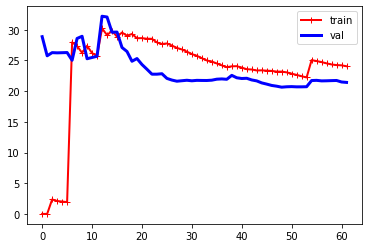

In [184]:
lin_reg = sklearn.linear_model.LinearRegression()
plot_learning_curves(lin_reg, X0, y0)

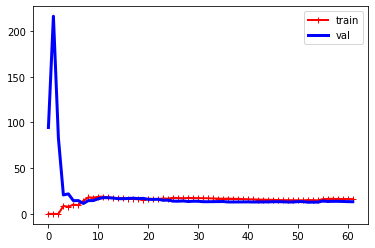

In [186]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
("lin_reg", sklearn.linear_model.LinearRegression()),
])
plot_learning_curves(polynomial_regression, X0, y0)

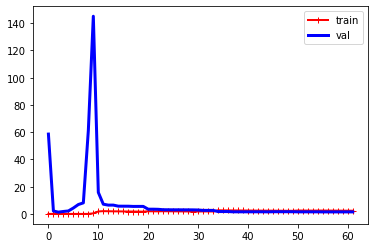

In [187]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", sklearn.linear_model.LinearRegression()),
])
plot_learning_curves(polynomial_regression, X0, y0)